In [11]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LinearRegression
import numpy as np


In [12]:
#Step1: Upload 'insurance.csv' file
uploaded = files.upload()
data = pd.read_csv("ClusterData.csv")
print("Data Summary:\n", data.describe())

Saving ClusterData.csv to ClusterData (1).csv
Data Summary:
        data science  cluster analysis    college    startup  entrepreneur  \
count     48.000000         48.000000  48.000000  48.000000     48.000000   
mean      -0.000833         -0.012500   0.060625   0.013542      0.031667   
std        0.971397          0.972073   0.982906   1.023726      0.974069   
min       -1.270000         -1.700000  -1.960000  -1.830000     -1.940000   
25%       -0.662500         -0.730000  -0.617500  -0.650000     -0.607500   
50%       -0.235000         -0.135000  -0.050000  -0.055000      0.070000   
75%        0.352500          0.412500   0.747500   0.332500      0.485000   
max        2.730000          2.910000   2.360000   2.630000      2.740000   

             ceo   mortgage        nba        nfl        mlb  ...  \
count  48.000000  48.000000  48.000000  48.000000  48.000000  ...   
mean   -0.030000  -0.026250  -0.025000  -0.027292   0.021458  ...   
std     0.910588   0.984956   0.998769

In [13]:
#Step2: Drop categorical columns
data_numeric = data.drop(['State', 'state_code'], axis=1)

In [14]:
#Step3: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [16]:
#Step4: Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering()
hierarchical_labels = hierarchical.fit_predict(data_scaled)

In [17]:
#Step5: Apply KMeans with k=7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

In [18]:
#Step6: Apply Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(data_scaled, data_numeric['PsychRegions'])
gnb_predictions = gnb.predict(data_scaled)

In [19]:
#Step7: Classification report
classification_report_gnb = classification_report(data_numeric['PsychRegions'], gnb_predictions)
print("Classification Report:\n", classification_report_gnb)


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        14

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



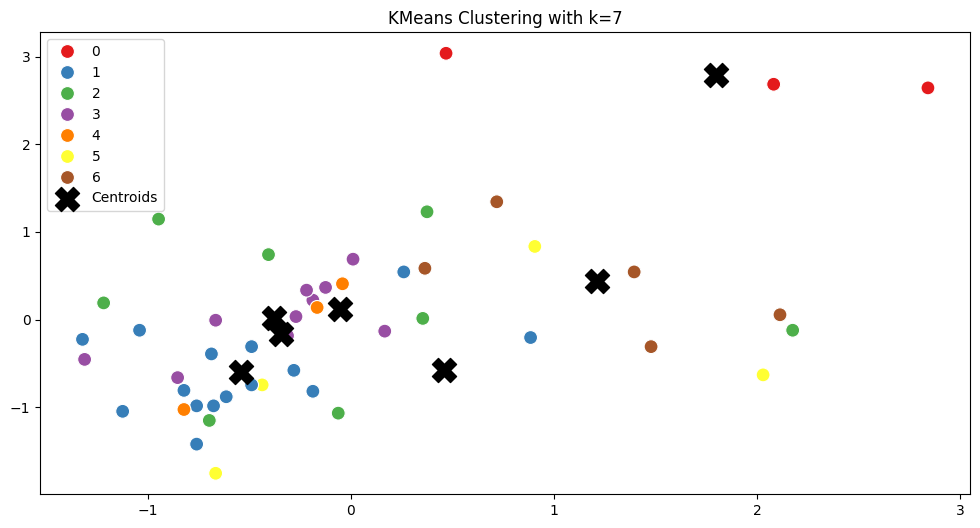

In [20]:
#Step8: Visualize KMeans Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('KMeans Clustering with k=7')
plt.legend()
plt.show()